# Checkpoint 1

Reminder: 

- You are being evaluated for completion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>).


Include comments throughout your code! Every cleanup and preprocessing task should be documented.

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [495]:
from enum import unique

import numpy as np, pandas as pd, matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [496]:
df = pd.read_csv('../data/states_edu.csv')

df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [497]:
# make the column names lowercase
df.columns = df.columns.str.lower()

# get all columns with numerical items except for year
numerical_columns = df.select_dtypes(include='number').columns.drop('year')

# checking to see the amount of NaN (missing) values in each numerical column
df[numerical_columns].isna().sum()

# right now, the revenues and the expenditures are irrelevant. Let us see if the variance between these values throughout the years is small enough for the mean to approximate their missing values

df[numerical_columns].describe()

# the standard deviation for these fields is, at times, an order of magnitude larger than the mean. This suggests a high variability in the data. Thus I will be using the median to approximate these missing values, as the median is not influenced by outliers in the data. Note that this is only done for columns which are not of immediate concern, as this can lead to errors down the line.

only_rev_and_exp = numerical_columns.drop(['enroll', 'grades_pk_g', 'grades_1_8_g', 'grades_kg_g', 'grades_9_12_g', 'grades_4_g', 'grades_8_g', 'grades_12_g', 'grades_all_g', 'avg_math_8_score', 'avg_math_4_score', 'avg_reading_8_score', 'avg_reading_4_score'])

df[only_rev_and_exp] = df[only_rev_and_exp].fillna(df[only_rev_and_exp].median())

# since I am trying to analyze the grade 8 average math score, I need to delete all the rows with that have a missing value for said column

df.dropna(subset=['avg_math_8_score'], inplace=True)

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: *GRADE 8 MATH*

How many years of data are logged in our dataset? 

In [498]:
unique_years = len(df['year'].unique())

print(f'{unique_years} unique years')

13 unique years


Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [499]:
michigan = df[df['state'] == 'MICHIGAN']['avg_math_8_score'].mean()
ohio = df[df['state'] == 'OHIO']['avg_math_8_score'].mean()

if michigan > ohio:
    print(f'Michigan has the higher average of {michigan} than Ohio with {ohio}')
elif michigan == ohio:
    print(f'Michigan and Ohio have the same average of {michigan}')
else:
    print(f'Ohio has the higher average of {ohio} than Michigan with {michigan}')

Ohio has the higher average of 282.25 than Michigan with 276.1666666666667


Find the average for your chosen test across all states in 2019

In [500]:
only_2019 = df[df['year'] == 2019]


average_for_all_states = only_2019['avg_math_8_score'].mean()

print(f'average for all states: {average_for_all_states}')

average for all states: 281.2641509433962


For each state, find a maximum value for your chosen test score

In [501]:
all_states = df.groupby('state')

all_states['avg_math_8_score'].max()


state
ALABAMA                 269.0
ALASKA                  283.0
ARIZONA                 283.0
ARKANSAS                279.0
CALIFORNIA              277.0
COLORADO                292.0
CONNECTICUT             289.0
DELAWARE                284.0
DISTRICT_OF_COLUMBIA    269.0
DODEA                   293.0
FLORIDA                 281.0
GEORGIA                 281.0
HAWAII                  281.0
IDAHO                   287.0
ILLINOIS                285.0
INDIANA                 288.0
IOWA                    286.0
KANSAS                  290.0
KENTUCKY                282.0
LOUISIANA               273.0
MAINE                   289.0
MARYLAND                288.0
MASSACHUSETTS           301.0
MICHIGAN                280.0
MINNESOTA               295.0
MISSISSIPPI             274.0
MISSOURI                286.0
MONTANA                 293.0
NATIONAL                285.0
NEBRASKA                288.0
NEVADA                  278.0
NEW_HAMPSHIRE           296.0
NEW_JERSEY              296.0
NEW_

*Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [502]:
# I will only consider capital outlay expenditure, instruction expenditure, and support service expenditure as these impact the students directly.

# since both enroll and grades_all_g measure total student enrollment, I will check which one has less missing values

df[['enroll', 'grades_all_g']].isna().sum()

# there are less missing values in grades_all_g. I will try to replace any missing values in this column with corresponding values from enroll if they exist.

df['grades_all_g'].fillna(df['enroll'])

# it did not change the total, seems like the rows that are missing grades_all_g are also missing enroll.
df['grades_all_g'].isna().sum()

# i am going to drop all rows that do not have an entry for grades_all_g. Also drop the enroll column
df.dropna(subset=['grades_all_g'], inplace=True)
df.drop('enroll', axis=1, inplace=True)

df['expenditure_per_student'] = (df['instruction_expenditure'] + df['support_services_expenditure'] + df['capital_outlay_expenditure']) / df['grades_all_g']

# now I will calculate the total revenue per student

df['revenue_per_student'] = df['total_revenue'] / df['grades_all_g']

# now I will calculate how much of the total revenue per student has gone to the expenditure per student

df['revenue_per_student_utilization'] = df['expenditure_per_student'] / df['revenue_per_student']


Feature engineering justification: expenditure per student is a quantifiable measure of the total amount of resources spent on a single child's education. Revenue per student gives us the pool from which this expenditure is drawn for each student. The ratio between these values, if close to 1, indicates that the state has indeed allocated most resources towards the students' education, but if it does not, it means the state has prioritized other expenses.

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

<Axes: title={'center': 'Correlation between 8th and 4th grade scores'}, xlabel='avg_math_4_score', ylabel='avg_math_8_score'>

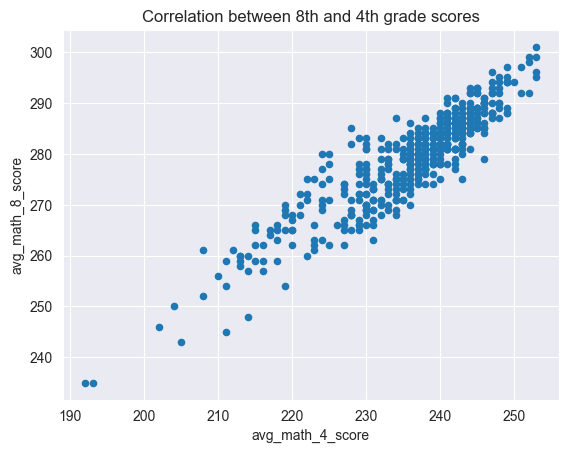

In [503]:
# it is suitable to analyze the correlation between 4th grade math skills and 8th grade math skills

df.plot.scatter(x='avg_math_4_score', y='avg_math_8_score', title='Correlation between 8th and 4th grade scores')

**<CAPTION FOR VIZ 1>**

**Visualization 2**

<Axes: title={'center': 'Correlation between revenue utilization and math scores'}, xlabel='revenue_per_student_utilization', ylabel='avg_math_8_score'>

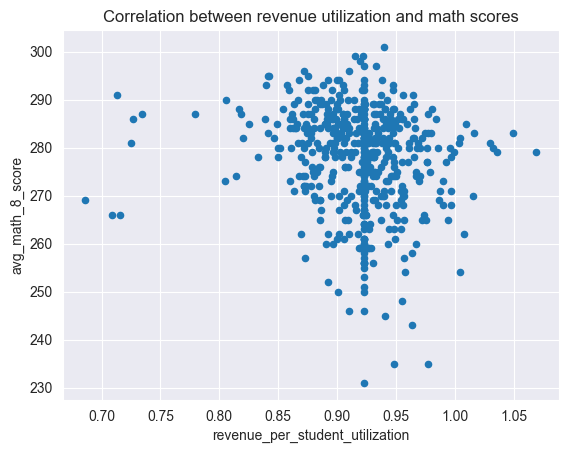

In [504]:
# we can also analyze the correlation between expenditure to revenue ratio for each student and their performance on the math test

df.plot.scatter(x='revenue_per_student_utilization', y='avg_math_8_score', title='Correlation between revenue utilization and math scores')

<Axes: title={'center': 'Correlation between 8th grade reading and math scores'}, xlabel='avg_reading_8_score', ylabel='avg_math_8_score'>

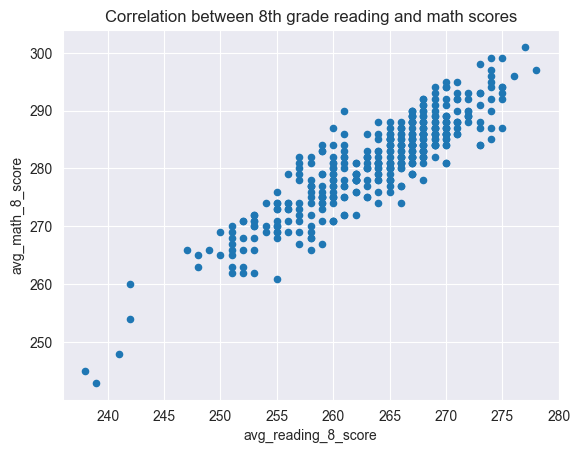

In [505]:
# We can now check for correlation between the reading score and the math score for students. Are students who are good at one good at the other as well?

df.plot.scatter(x='avg_reading_8_score', y='avg_math_8_score', title='Correlation between 8th grade reading and math scores')

**<CAPTION FOR VIZ 2>**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [506]:
from sklearn.model_selection import train_test_split

In [507]:
combined_df = df[['avg_math_4_score', 'avg_reading_8_score', 'revenue_per_student_utilization', 'avg_math_8_score']].dropna()


x = combined_df[['avg_math_4_score', 'avg_reading_8_score', 'revenue_per_student_utilization']]
y = combined_df['avg_math_8_score']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [508]:
from sklearn.linear_model import LinearRegression

In [509]:
# create your model here
model = LinearRegression()

In [510]:
model.fit(x_train, y_train)

LinearRegression()

In [511]:
y_pred = model.predict(x_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [512]:
# the mean squared error, or the root mean squared error, are valuable measures of the differences in predicted and actual values.

# while the coefficient of determination has many drawbacks, it has an adjusted version which accounts for both the number of observations and number of predictors into account, making it more reliable.

MSE = np.mean((y_test - y_pred) ** 2)
RMSE = np.sqrt(MSE)
R2 = model.score(x_test, y_test)

n = len(y_test)
p = x_test.shape[1]

# Adjusted R-squared
R2_adjusted = 1 - (1 - R2) * (n - 1) / (n - p - 1)

print(f"MSE: {MSE}, RMSE: {RMSE}, R2: {R2}, R2 Adjusted: {R2_adjusted}")

MSE: 5.7042287307735995, RMSE: 2.388352723274684, R2: 0.9172451152461343, R2 Adjusted: 0.9140622350632933


We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

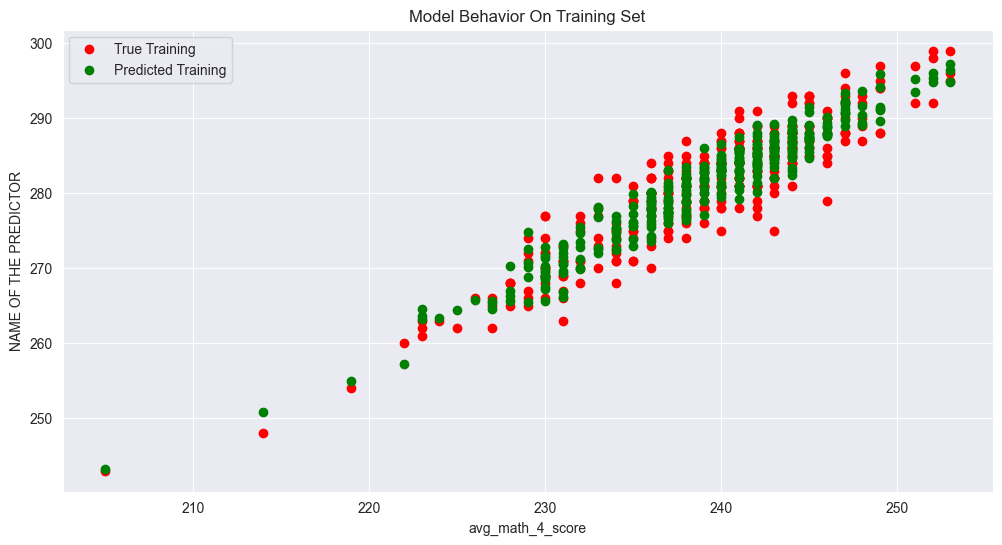

In [513]:
col_name = 'avg_math_4_score'

f = plt.figure(figsize=(12,6))
plt.scatter(x_train[col_name], y_train, color = "red")
plt.scatter(x_train[col_name], model.predict(x_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('NAME OF THE PREDICTOR')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

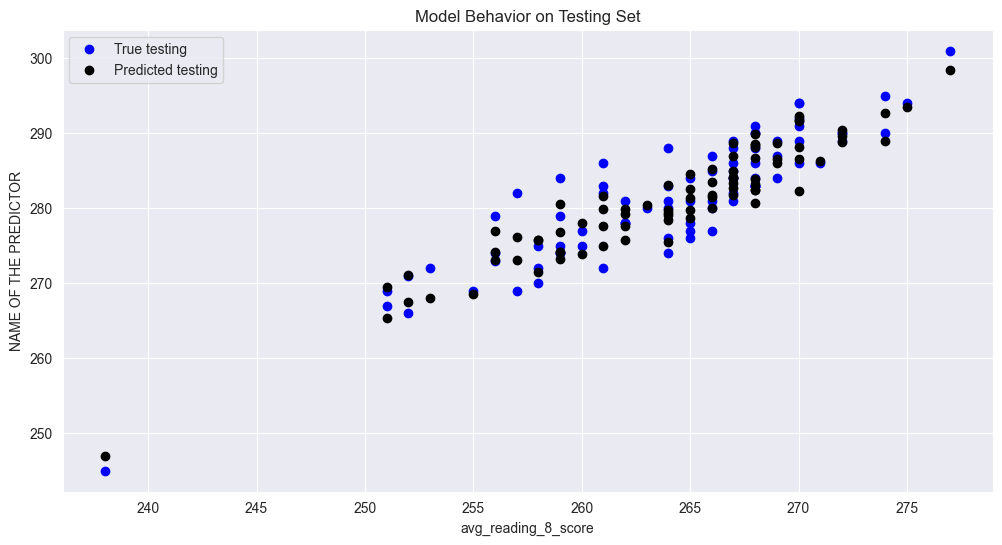

In [514]:
col_name = "avg_reading_8_score"

f = plt.figure(figsize=(12,6))
plt.scatter(x_test[col_name], y_test, color = "blue")
plt.scatter(x_test[col_name], model.predict(x_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('NAME OF THE PREDICTOR')
plt.title("Model Behavior on Testing Set")